In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
print("Everything imported successfully!")


Everything imported successfully!


In [13]:
raw = mne.io.read_raw_gdf('C:/Users/llrpo/Documents/BCI_Project/A01T.gdf', preload=True)
print("Data loaded!")
print(f"Number of channels: {len(raw.ch_names)}")
print(f"Sampling rate: {raw.info['sfreq']} Hz")
print(f"Duration: {raw.times[-1]} seconds")

Extracting GDF parameters from C:/Users/llrpo/Documents/BCI_Project/A01T.gdf...
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


C:\Users\llrpo\anaconda3\envs\bci\lib\contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Data loaded!
Number of channels: 25
Sampling rate: 250.0 Hz
Duration: 2690.108 seconds


In [14]:
print("Channel names:")
print(raw.ch_names)

Channel names:
['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']


In [15]:
print("=== BASIC INFO ===")
print(f"Number of channels: {len(raw.ch_names)}")
print(f"Sampling rate: {raw.info['sfreq']} Hz")
print(f"Duration: {raw.times[-1]:.1f} seconds")
print()
print("=== FIRST 10 CHANNEL NAMES ===")
for i, name in enumerate(raw.ch_names[:10]):
    print(f"Channel {i}: {name}")
    

=== BASIC INFO ===
Number of channels: 25
Sampling rate: 250.0 Hz
Duration: 2690.1 seconds

=== FIRST 10 CHANNEL NAMES ===
Channel 0: EEG-Fz
Channel 1: EEG-0
Channel 2: EEG-1
Channel 3: EEG-2
Channel 4: EEG-3
Channel 5: EEG-4
Channel 6: EEG-5
Channel 7: EEG-C3
Channel 8: EEG-6
Channel 9: EEG-Cz


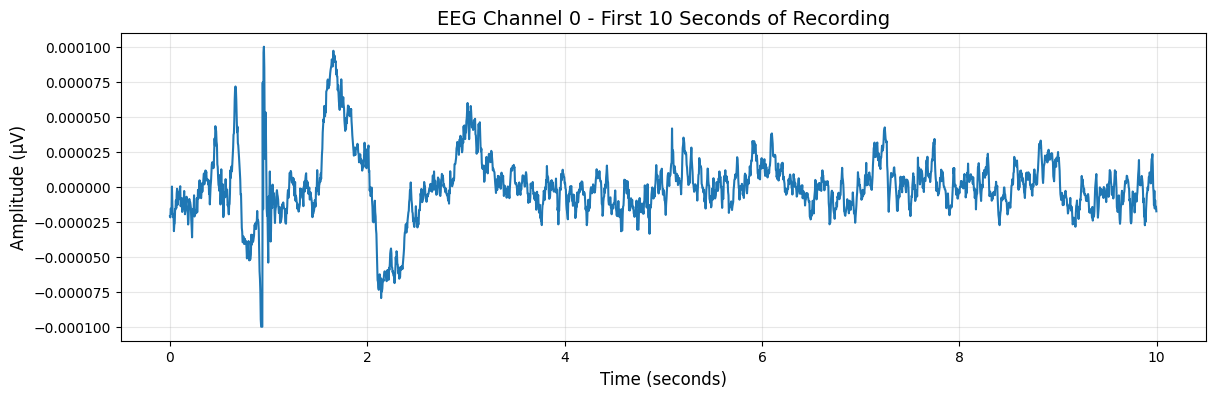

✓ Plot created successfully!


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get just the EEG data (not EOG channels)
data = raw.get_data()

# Plot first channel, first 10 seconds
# 250 Hz means 2500 samples = 10 seconds
time_points = 2500
time_axis = np.arange(time_points) / 250.0  # Convert to seconds

plt.figure(figsize=(14, 4))
plt.plot(time_axis, data[0, :time_points])
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Amplitude (µV)', fontsize=12)
plt.title('EEG Channel 0 - First 10 Seconds of Recording', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

print("✓ Plot created successfully!")

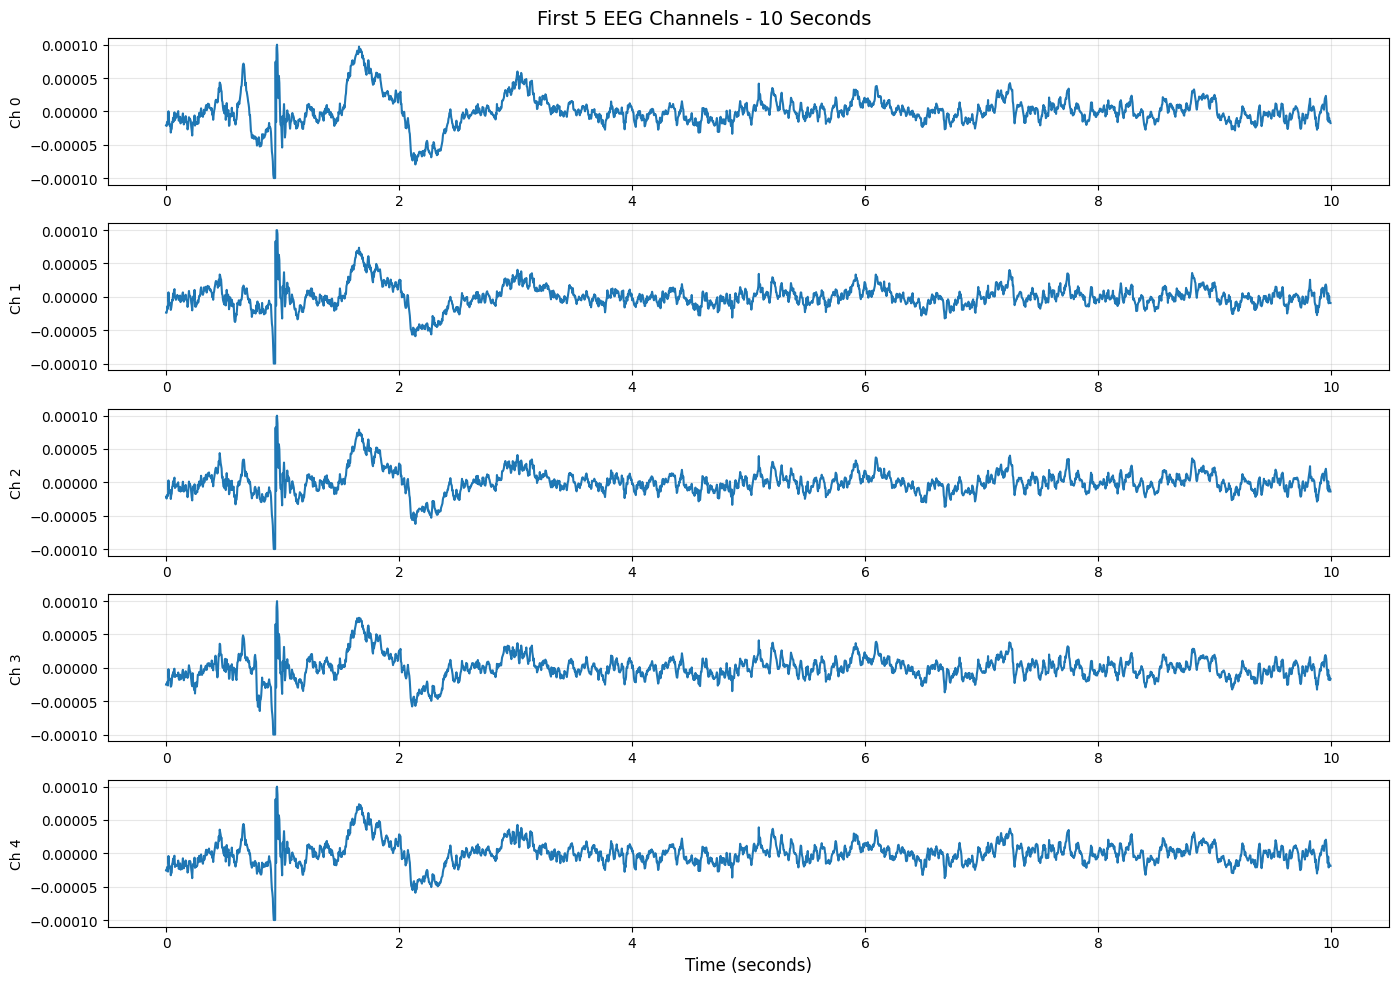

In [11]:
# Plot first 5 channels stacked
fig, axes = plt.subplots(5, 1, figsize=(14, 10))

for i in range(5):
    axes[i].plot(time_axis, data[i, :time_points])
    axes[i].set_ylabel(f'Ch {i}', fontsize=10)
    axes[i].grid(True, alpha=0.3)
    
axes[4].set_xlabel('Time (seconds)', fontsize=12)
plt.suptitle('First 5 EEG Channels - 10 Seconds', fontsize=14)
plt.tight_layout()
plt.show()

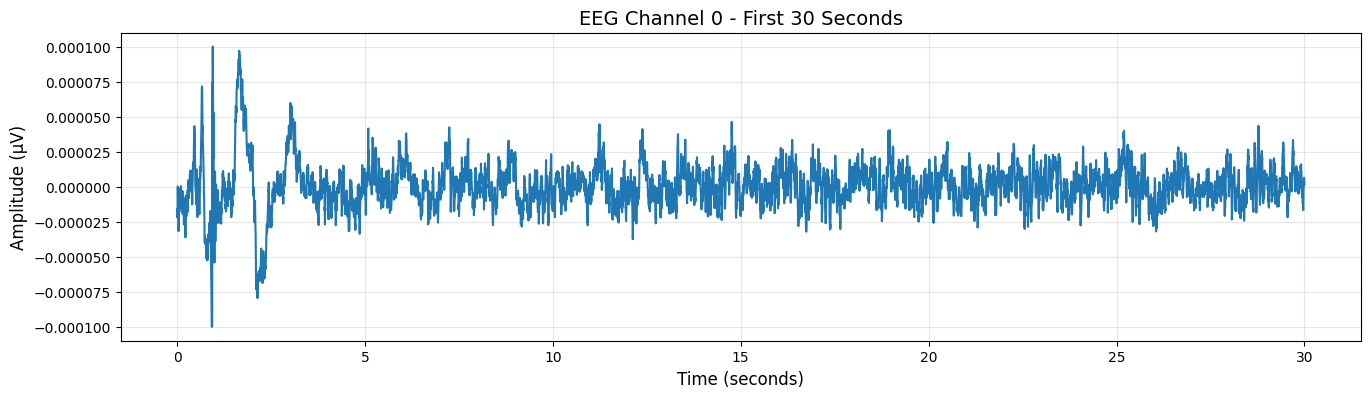

In [16]:
time_points_long = 7500  # 30 seconds at 250 Hz
time_axis_long = np.arange(time_points_long) / 250.0

plt.figure(figsize=(16, 4))
plt.plot(time_axis_long, data[0, :time_points_long])
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Amplitude (µV)', fontsize=12)
plt.title('EEG Channel 0 - First 30 Seconds', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()